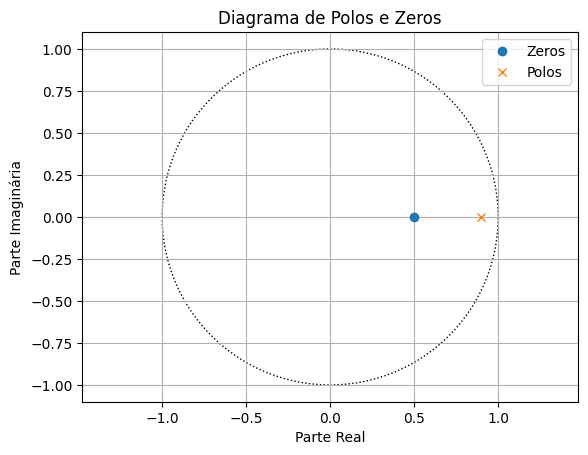

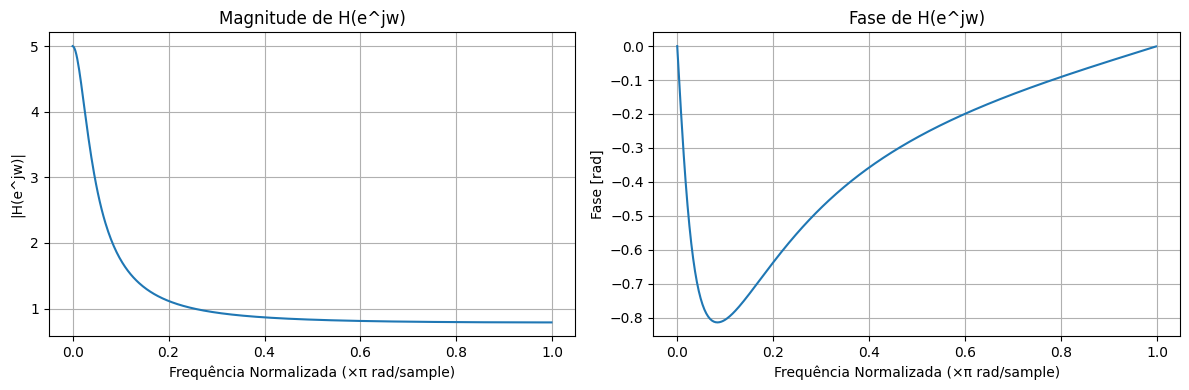

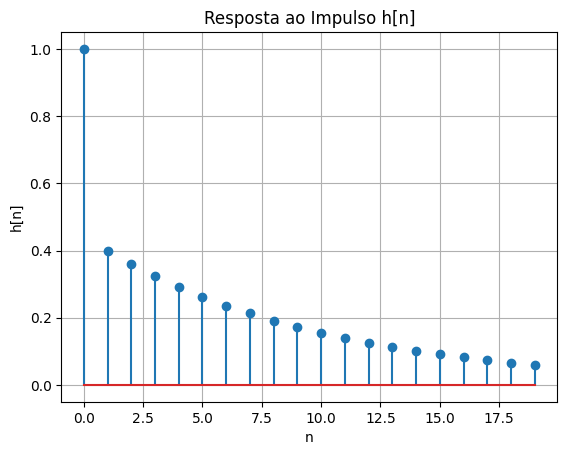

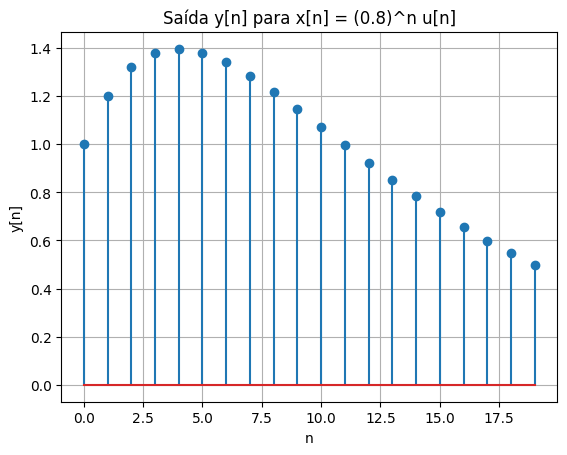

In [ ]:
# 🔁 Simulação: Sistema LTI definido por H(z) = (1 - 0.5z^-1) / (1 - 0.9z^-1)
# Passo 1: Definir a função de transferência (H(z))
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz, lfilter, dimpulse, dlti

# Numerador (zeros): (1 - 0.5z^-1)
b = [1, -0.5]
# Denominador (polos): (1 - 0.9z^-1)
a = [1, -0.9]

# 🎯 Passo 2: Plotar zeros e polos
def plot_pole_zero(b, a):
    from matplotlib import patches
    z = np.roots(b)
    p = np.roots(a)
    fig, ax = plt.subplots()
    unit_circle = patches.Circle((0, 0), radius=1, fill=False, ls='dotted', color='black')
    ax.add_patch(unit_circle)
    ax.plot(np.real(z), np.imag(z), 'o', label='Zeros')
    ax.plot(np.real(p), np.imag(p), 'x', label='Polos')
    ax.set_xlabel('Parte Real')
    ax.set_ylabel('Parte Imaginária')
    ax.set_title('Diagrama de Polos e Zeros')
    ax.grid()
    ax.legend()
    ax.axis('equal')
    plt.show()

plot_pole_zero(b, a)

# 🎧 Passo 3: Resposta em frequência
w, h = freqz(b, a, worN=512)
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(w/np.pi, np.abs(h))
plt.title('Magnitude de H(e^jw)')
plt.xlabel('Frequência Normalizada (×π rad/sample)')
plt.ylabel('|H(e^jw)|')
plt.grid()

plt.subplot(1,2,2)
plt.plot(w/np.pi, np.angle(h))
plt.title('Fase de H(e^jw)')
plt.xlabel('Frequência Normalizada (×π rad/sample)')
plt.ylabel('Fase [rad]')
plt.grid()
plt.tight_layout()
plt.show()

# 💥 Passo 4: Resposta ao impulso (h[n])
system = dlti(b, a)
t, h_imp = dimpulse(system, n=20)

plt.stem(t, np.squeeze(h_imp))
plt.title('Resposta ao Impulso h[n]')
plt.xlabel('n')
plt.ylabel('h[n]')
plt.grid()
plt.show()

# ⚙️ Passo 5: Resposta a uma entrada arbitrária x[n] = (0.8)^n u[n]
n = np.arange(0, 20)
x = (0.8)**n
y = lfilter(b, a, x)

plt.stem(n, y)
plt.title('Saída y[n] para x[n] = (0.8)^n u[n]')
plt.xlabel('n')
plt.ylabel('y[n]')
plt.grid()
plt.show()
